# Titanic

Se adjunta un dataset sobre el desastre del Titanic.

Algunos ejercicios que vamos a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



In [2]:
# Importamos librerías 

import pandas as pd
import numpy as np
import os # para obtener directorio activo 
import re # para el uso de expresiones regulares
import requests # para descargar ficheros
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # para gráficos interactivos

In [3]:
# Leemos el csv y lo convertimos en dataframe:

titanic=pd.read_csv(r"C:\Users\elena\OneDrive\Escritorio\Samplerepo\MÓDULO 1\13-Trabajo del Módulo I\datos\titanic.csv")

CONTENIDO DE LOS DATOS, ANÁLISIS Y CONCLUSIONES:

1- CONTENIDO DE LOS DATOS:

El titanic fue un transatlántico británico que hasta la fecha era el mayor barco de pasajeros del mundo, naufragó en 1912 mientras realizaba su viaje 
inaugural desde Southampton a Nueva York, tras chocar con un iceberg. En el hundimiento murieron 1496 personas de las 2208 que iban a bordo, entre
pasajeros y tripulación, en este estudio basaremos el análisis únicamente en los pasajeros.

In [4]:
titanic 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.shape # nuestro df tiene 891 filas (pasajeros) y 12 columnas

(891, 12)

In [6]:
titanic.columns.tolist() # comprobamos las columnas  y definimos su contenido:
 
# 'PassengerId': Id pasajero  
# 'Survived': Sobrevivió 1, no 0;
# 'Pclass': Si viajaba en 1ª, 2ª o 3ª clase 
# 'Name': Nombre
# 'Sex': Hombre o mujer
# 'Age': Edad
# 'SibSP': Cantidad de hermanos/as o esposos/as a bordo
# 'Parch': Cantidad de padres o hijos a bordo
# 'Ticket': Número de ticket
# 'Fare': Tarifa
# 'Cabin': Cabina donde estaba alojado
# 'Embarked': Puerto de embarque S: Southampton, C: Cherburgo y Q: Queenstown

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
titanic.info() # comprobamos el tipo de datos que contienen las columnas, y ya observamos que hay valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.isnull() # podemos observar que en la columna 'Cabin' ya tenemos valores nulos (True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# Comprobamos los valores nulos por columnas:
 
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic.isnull().sum().sum() # total de valores nulos en el df 

866

In [11]:
# Porcentaje de nulos por columnas: 

titanic.isnull().sum() *100/ len(titanic) 

# En la columa 'Cabin' el número de nulos es demasiado elevado para repararlo: 77% , por lo que procederemos a eliminarla, puesto que no nos sirve 
# para analizarla.

# Las columnas 'Age' y 'Embarked' tienen un porcentaje menor y si podemos repararlas y/o tratarlas.

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

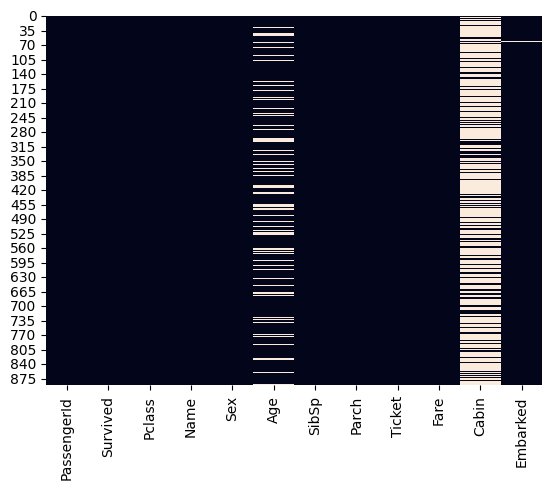

In [12]:
# Representamos los valores nulos por filas de nuestro df con un mapa de calor, donde podemos apreciar que la columna 'Cabin' no nos sirve, 
# 'Age', será útil si la reparamos y 'Embarked' puede ser útil tal como está:

sns.heatmap(titanic.isnull(), cbar=False);

In [13]:
# Comprobamos los valores nulos en la columna 'Cabin': '687', la que posteriormente vamos a eliminar, ya que además es un valor que no nos aporta ningún
# dato significativo para analizar, puesto se trata del número de la cabina de los pasajeros.

titanic[titanic['Cabin'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
# Comprobamos los valores nulos en la columna 'Embarked': '2'

titanic[titanic['Embarked'].isnull()==True] 

# Dos pasajeros no tienen definido donde embarcaron, pero este dato puede ser útil si analizamos por embarque, por lo tanto, lo tendremos en cuenta 
# y no vamos a modificarlo.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
# Comprobamos los valores nulos en la columna 'Age': '177'

titanic[titanic['Age'].isnull()==True]

# Había 177 pasajeros con edad no definida, que no podremos analizar por ese valor.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [16]:
# Limpieza de columnas:

# La columna que no se puede reparar, 'Cabin' , procedemos a eliminarla:

titanic_reparado=titanic.drop('Cabin',axis=1) # salvamos el nuevo df
titanic_reparado

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [17]:
# Salvamos el nuevo df en formato csv

titanic_reparado.to_csv("titanic_reparado")

In [18]:
titanic_reparado.shape # Comprobamos que la columna 'Cabin' ha sido eliminada, ya que ahora tenemos 11 columnas.

(891, 11)

In [19]:
titanic_reparado.columns # Comprobamos que la columna 'Cabin' ha sido eliminada

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
# Limpieza de columnas: vamos a reparar los valores nulos de la columna 'Age' , para ello vamos a ver que dato nos interesa más filtrar :

media=titanic_reparado['Age'].mean() # la media de edad es de 29 años.
mediana=titanic_reparado['Age'].median() # la mediana es de 28 (ordenando de menor a mayor el valor intermedio)
moda=titanic_reparado['Age'].mode() # la moda (el valor que más se repite) es de 24 años.
print(media)
print(mediana)
print(moda)

29.69911764705882
28.0
0    24.0
Name: Age, dtype: float64


In [21]:
# La franja de edades está muy cercana, por lo que cualquiera de ellas nos puede servir para no desvirtuar la información, nos quedamos con la media,
# que puede ser más útil para obtener valores medios finales y la sustituimos por los valores nulos:

titanic_reparado["Age"]=titanic_reparado["Age"].fillna(titanic_reparado["Age"].mean())

In [22]:
# Comprobamos que los valores nulos se han eliminado de la columna 'Age': 

titanic_reparado ['Age'].isnull().sum()

0

2 - ANÁLISIS:

Vamos a basar este estudio en el análisis de la supervivencia , con todas las variables posibles.

In [23]:
# Analizamos los datos por la variable edad:

#  Calculamos la edad media de los pasajeros, el pasajero con menor edad y el pasajero de edad más avanzada:

titanic_reparado['Age'].describe() 

# La media de edad era de 29 años, el pasajero de menor edad era un bebe de 4 meses y el mayor tenía 80 años.


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

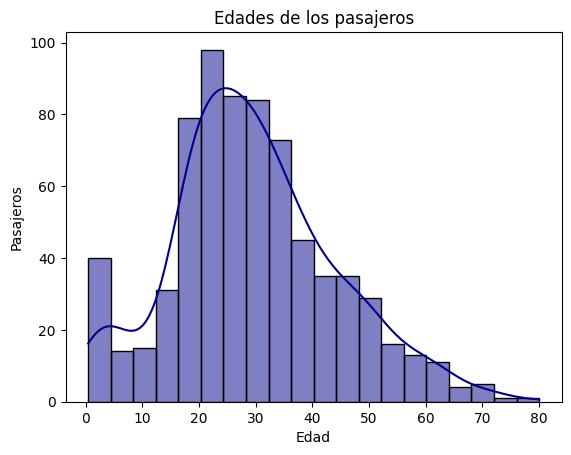

In [23]:
# Representamos con un gráfico de barras para ver la variable cuantitativa de edad: 

# Tomamos como 'data' el df inicial, con la columna 'Age' con valores nulos, ya que de lo contrario el gráfico nos mostrará 177 valores con la media 
# de 29 años, y no podemos tener una visión real de las edades que a ciencia cierta sabemos reales en el gráfico.

sns.histplot(titanic["Age"], kde=True, color='darkblue').set( title= 'Edades de los pasajeros', xlabel= 'Edad' , ylabel= 'Pasajeros');

# Este gráfico nos muestra que la mayoría de los pasajeros tenían edades comprendidas entre los 18 y los 35 años, siendo mayoría los pasajeros en torno 
# a los 25 años, con pocas personas mayores de 65 , muy pocas mayores de 70, y 40 pasajeros menores de 5 años.

In [24]:
# Vamos a seguir analizando el pasaje por edades : seguimos tomando los cálculos a partir del df inicial, teniendo en cuenta que hay 177 pasajeros 
# cuya edad no está definida (valores nulos), pero hacemos el estudio a partir de los datos que si conocemos son reales.

# Buscamos cuantos bebes viajaban en el barco: 

bebes=titanic['Age'][titanic['Age']<1].count()
bebes 

7

In [25]:
# Comprobamos cuantos niños menores de 5 años viajaban en el barco y sus edades:

niños=titanic['Age'][titanic['Age']<=5].value_counts()
niños 

# En el barco viajaban 44 niños pequeños, 30 entre 2 y 5 años, 7 con 1 año de edad y 7 bebes con meses de edad.

2.00    10
4.00    10
1.00     7
3.00     6
5.00     4
0.83     2
0.75     2
0.92     1
0.67     1
0.42     1
Name: Age, dtype: int64

In [26]:
# Comprobamos cuantos menores de edad viajaban en el barco:

menores_edad=titanic['Age'][titanic['Age']<18].count()
menores_edad

113

In [27]:
# Comprobamos cuantos mayores de 65 años viajaban en el barco y sus edades:

titanic['Age'][titanic['Age']>=65].value_counts()

# Podemos ver que había solo 11 personas mayores, entre los que estaba un pasajero de 80 años, el más mayor, (teniendo siempre en cuenta que 177 
# pasajeros se desconocía su edad).

65.0    3
71.0    2
70.0    2
66.0    1
70.5    1
80.0    1
74.0    1
Name: Age, dtype: int64

In [28]:
# Comprobamos cuantas personas de tercera edad viajaban:

tercera_edad=titanic['Age'][titanic['Age']>=65].count()
tercera_edad

11

In [29]:
# Comprobamos cuantos adultos viajaban:

adultos=titanic['Age'][titanic['Age']>=18][titanic['Age']<=64].count()
adultos

590

In [30]:
# Comprobamos cuantos pasajeros había con edad desconocida:

edad_desconocida=titanic['Age'].isnull().sum()
edad_desconocida

177

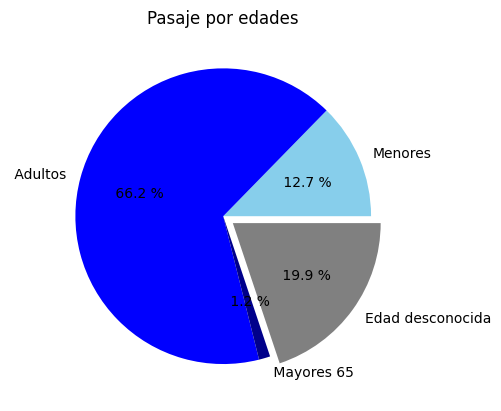

In [31]:
# Veamos ahora un gráfico que nos muestre los datos anteriores en porcentajes: menores, adultos , mayores de 65 años y edad desconocida que viajaban 
# en el barco : 

pasajeros=[menores_edad,adultos,tercera_edad,edad_desconocida]  
rangos=[ "Menores", " Adultos"," Mayores 65" , "Edad desconocida"]
plt.pie( pasajeros, labels= rangos, autopct="% 0.1f %%", colors=['skyblue','blue','darkblue','gray'], explode=[0,0,0,0.08] ) 
# fórmula para calcular porcentaje y explode:(fuente: numython.github.io)
plt.title('Pasaje por edades')
plt.show()

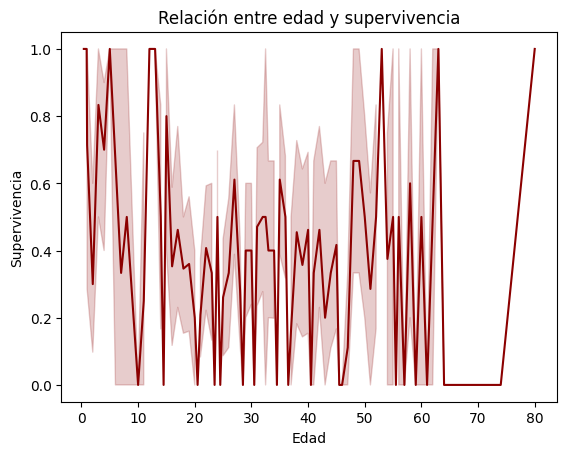

In [32]:
# Vamos a ver una relación entre la edad y la superviviencia con los datos reales que tenemos :

sns.lineplot(x="Age",y="Survived", data=titanic, color='darkred').set( title= 'Relación entre edad y supervivencia', xlabel= 'Edad' , ylabel= 'Supervivencia');

# En este gráfico podemos observar como la supervivencia fue más elevada para los menores de 15 años y para los mayores de 55, 
# viendo claramente la supervicencia de la persona más anciana de 80 años; el gráfico muestra de forma contundente como entre los 18 y los 50 años la 
# supervivencia se redujo drásticamente, por la prioridad que tenían los niños y los ancianos en subir a los botes salvavidas.

In [32]:
# Seguimos analizando la supervivencia por edades: ¿Sobrevivieron los bebes? 

titanic[(titanic['Age']<1) & (titanic['Survived']==1)]  # Comprobamos que los 7 bebes que viajaban sobrevivieron.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [33]:
# ¿Sobrevivieron los mayores de 65 años? 

titanic[(titanic['Age']>=65) & (titanic['Survived']==1)] 

# Comprobamos que de las 11 personas mayores de 65 años, solo sobrevivió el hombre de 80 años, que tenía la edad más avanzada del pasaje, lo que nos 
# lleva a la conclusión de que tanto los bebés y el pasajero más anciano (las personas más débiles) sobrevivieron.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [34]:
# ¿Sobrevivieron los niños menores de 5 años?

titanic[(titanic['Age']<=5) & (titanic['Survived']==1)]['Survived'].count() 

# Comprobamos la alta supervivencia de los niños , de los 44 que viajaban, 31 de ellos sobrevivieron.


31

In [35]:
# ¿Que ocurrió con los adultos?

titanic[(titanic['Age']>=18) & (titanic['Age']<=64) & (titanic['Survived']==1)]['Survived'].count()

# Comprobamos que de los 590 adultos que viajaban en el barco solo sobrevivieron 228, mucho menos de la mitad.

228

In [36]:
# ¿ Y que ocurrió con el pasaje de edades desconocidas?

titanic[(titanic['Age'].isnull()) & (titanic['Survived']==1)]['Survived'].count() 

# Observamos que de los 177 pasajeros de edades desconocidas, solo sobrevivieron 52, menos de una tercera parte, esto puede explicar porqué no se 
# conocían sus edades, si muchos de ellos murieron.

52

In [37]:
# Vamos ahora a analizar la supervivencia de todos los pasajeros:

titanic_reparado['Survived'].value_counts() # Sobrevivieron 342 pasajeros, menos de la mitad.

0    549
1    342
Name: Survived, dtype: int64

In [38]:
# Calculamos el porcentaje de supervivencia:

titanic_reparado['Survived'].value_counts()*100/ len (titanic_reparado) # solo sobrevivió el 38 % del pasaje

0    61.616162
1    38.383838
Name: Survived, dtype: float64

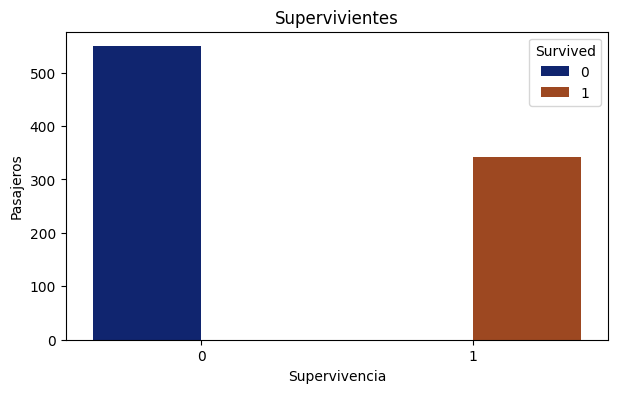

In [40]:
# Lo vemos de forma más clara en un gráfico:

plt.figure(figsize=(7,4))
sns.countplot(x='Survived',data=titanic_reparado, palette='dark',hue='Survived').set( title= 'Supervivientes', xlabel= 'Supervivencia' , ylabel= 'Pasajeros');


In [39]:
# Analizamos ahora la variable de sexos:

titanic_reparado['Sex'].value_counts() # la mayoría del pasaje eran hombres.

male      577
female    314
Name: Sex, dtype: int64

In [40]:
titanic_reparado['Sex'].value_counts()*100/len (titanic_reparado)  # vemos el porcentaje de hombres y mujeres, más del 60 % eran hombres.

male      64.758698
female    35.241302
Name: Sex, dtype: float64

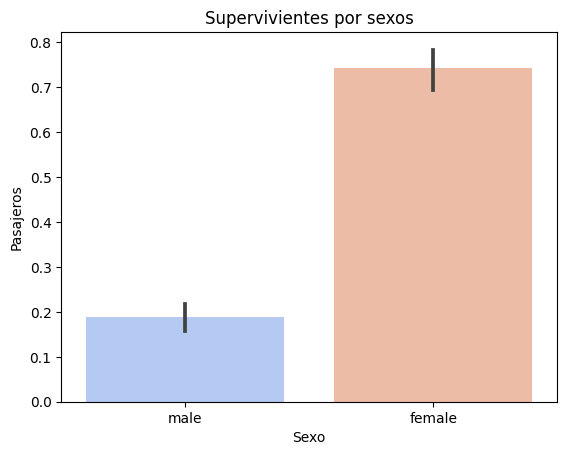

In [41]:
# ¿Cómo afectó este dato a la superviviencia? 

sns.barplot(x='Sex',y='Survived',data=titanic_reparado, palette='coolwarm').set( title='Supervivientes por sexos', xlabel= 'Sexo' , ylabel= 'Pasajeros');

# Observamos que la mayoría de personas que sobrevivieron eran mujeres, por la prioridad que tuvieron al subir al bote salvavidas.

In [42]:
# Si la prioridad eran las mujeres, por qué algunas murieron y algunos hombres se salvaron? Vamos a comprobar si tenía relación con la clase en la 
# que viajaban:

titanic_reparado[(titanic_reparado['Sex']=='female') & (titanic_reparado['Survived']==0)& (titanic_reparado['Pclass']>=2)] 

# hacemos un filtro por mujeres que fallecieron y por la 2ª y 3ª clase, y efectivamente comprobamos que la mayoría de mujeres que murieron 
# viajaban en 2 y 3ª clase.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.8542,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.000000,1,0,345763,18.0000,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.000000,3,1,349909,21.0750,S
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,S
...,...,...,...,...,...,...,...,...,...,...,...
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.000000,1,0,244252,26.0000,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,Q


In [43]:
# Comprobamos cuantas mujeres murieron de 1ª clase:

titanic_reparado[(titanic_reparado['Sex']=='female') & (titanic_reparado['Survived']==0)& (titanic_reparado['Pclass']==1)] 

# Podemos comprobar que solo fallecieron tres mujeres que viajaban en 1ª clase, por lo que aún teniendo todas las mujeres prioridad, se hizo distinción 
# entre clases.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,S


In [44]:
# Teniendo en cuenta lo anterior ¿ en qué clase viajaban los hombres que se salvaron? 

titanic_reparado[(titanic_reparado['Sex']=='male') & (titanic_reparado['Survived']==1)]['Pclass'].value_counts()

# Parece no haber una gran diferencia entre la supervivencia de 1ª clase y 3ª, pero si tenemos en cuenta que en 3ª clase viajaba más del 50 % del 
# pasaje, queda claro que se hizo distinción entre clases para ambos sexos.

3    47
1    45
2    17
Name: Pclass, dtype: int64

In [45]:
# Vamos ahora a analizar la supervivencia respecto a las clases:

# ¿Cuantos pasajeros viajaban en cada clase?

titanic_reparado['Pclass'].value_counts() # donde mayor pasajeros había era en tercera clase

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [46]:
# Calculamos el porcentaje de pasajeros por clases:

titanic_reparado['Pclass'].value_counts()* 100/ len(titanic_reparado) # el 55 % del pasaje viajaba en 3ª clase

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

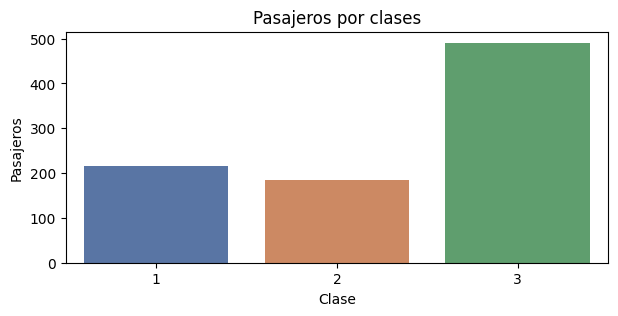

In [49]:
# Representamos el dato anterior en un gráfico:

plt.figure(figsize=(7,3))
sns.countplot(x='Pclass',data=titanic_reparado, palette='deep').set( title= 'Pasajeros por clases', xlabel= 'Clase' , ylabel= 'Pasajeros');

In [47]:
# ¿Cúantos sobrevivieron de cada clase?

titanic_reparado[titanic_reparado['Survived']==1]['Pclass'].value_counts() 

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [48]:
# Calculamos el porcentaje de supervivencia por clases:

titanic_reparado[titanic_reparado['Survived']==1]['Pclass'].value_counts()*100/ titanic_reparado['Pclass'].value_counts() 

# Observamos como el porcentaje de supervivencia de la 1ª clase es del 62 %, frente al solo 24 % de la tercera clase.

1    62.962963
2    47.282609
3    24.236253
Name: Pclass, dtype: float64

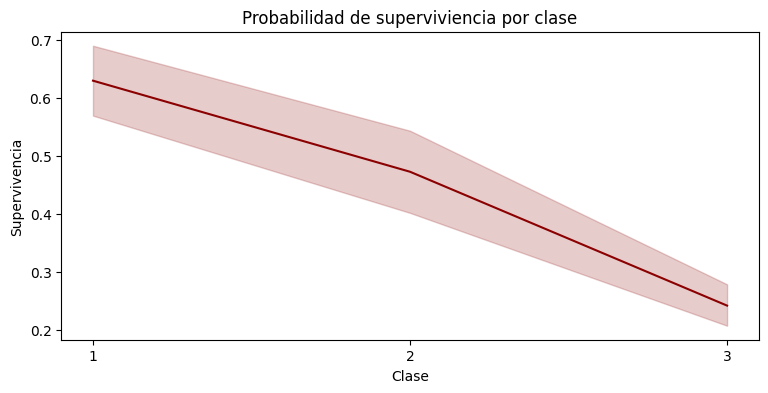

In [52]:
# Analizamos la probabilidad de supervivencia respecto a la clase:

plt.figure(figsize=(9,4))
sns.lineplot(x ="Pclass", y = "Survived", data=titanic_reparado, color = "darkred").set( title= 'Probabilidad de superviviencia por clase', xlabel= 'Clase' , ylabel= 'Supervivencia', xticks=([1, 2, 3]));

# Podemos ver como era más probable sobrevivir si viajabas en 1ª clase.

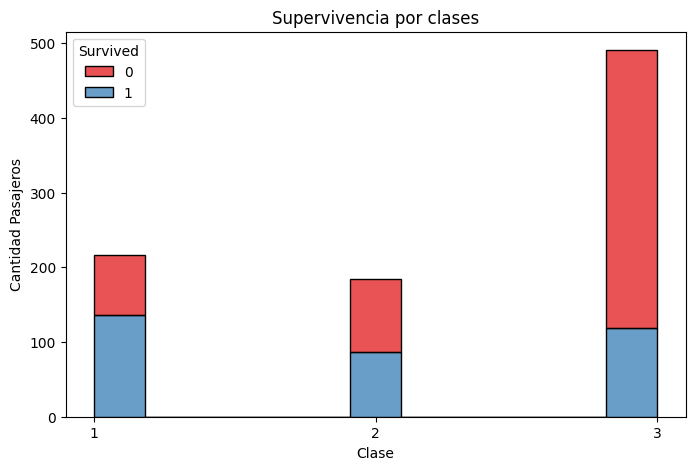

In [53]:
# Mostramos la cantidad de supervivientes en cada clase:

plt.figure(figsize=(8,5))
sns.histplot(titanic_reparado, x='Pclass', hue= 'Survived', palette='Set1', multiple='stack').set(xticks=([1, 2, 3])); # stack para no superponer datos
plt.title ('Supervivencia por clases')
plt.xlabel ('Clase')
plt.ylabel ('Cantidad Pasajeros');

# Vemos en rojo las personas que fallecieron, pudiendo ver de forma clara el gran porcentaje de personas que fallecieron en 3ª clase.

In [49]:
# Analizamos ahora la variable 'Fare' precio del ticket:

# ¿Quién pagó el precio más alto y quién el más bajo? 

titanic_reparado['Fare'].describe() # podemos ver que el precio más alto fue de 512, y el más bajo 0, con una media de 32 por ticket.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [50]:
# Comprobamos los tickets de tarifa 0:

titanic_reparado[(titanic_reparado['Fare']==0)] 

# Vemos que varios pasajeros no pagaron o se desconoce el precio de su tarifa, y que sólo 1 de este grupo sobrevivió.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,S


In [51]:
# Comprobamos los pasajeros que pagaron la tarifa más alta:

titanic_reparado[titanic_reparado['Fare']>=512] 

# Observamos que hay tres pasajeros que pagaron la tarifa más alta de 512 ( muy por encima de la media de 32 por ticket) y todos sobrevivieron.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [52]:
# ¿ Qué relación había entre la tarifa mayor y la supervivencia? 

# Vamos a calcular los que pagaron por encima de 100 por su ticket:

mayores_tarifas=titanic_reparado[(titanic_reparado['Fare']>=100)]['Fare'].count()
mayores_tarifas 

# Había 53 pasajeros que pagaron unas tarifas muy por encima de la media de 32.

53

In [57]:
# ¿Qué porcentaje de supervivencia tuvieron? :

titanic_reparado[(titanic_reparado['Fare']>100) & (titanic_reparado['Survived']==1)]["PassengerId"].count()*100/mayores_tarifas

# Podemos comprobar que tenían un porcentaje de supervivencia de más del 73 % .

73.58490566037736

In [59]:
# Analizamos ahora por 'Embarked': el puerto por donde embarcaron, renombremos los valores de las columnas para hacerlo más comprensible:

titanic_reparado['Embarked']=titanic_reparado['Embarked'].replace(['Q','S', 'C'],['Queenstown','Southampton','Cherburgo']) 
titanic_reparado['Embarked']

0      Southampton
1        Cherburgo
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherburgo
890     Queenstown
Name: Embarked, Length: 891, dtype: object

In [60]:
# Veamos una relación entre la tarifa que pagaron con los puertos donde embarcaron:

px.area(titanic_reparado, x='Embarked', y='Fare',title='Tarifas por puerto de embarque', template='plotly_white')

# Podemos comprobar que las tarifas más elevadas se pagaron en Cherburgo, donde por tanto embarcaron muchos pasajeros de 1ª clase, y las más bajas
# se abonaron en Queenstown.

In [61]:
# ¿Cuantas personas embarcaron en cada puerto?

titanic_reparado['Embarked'].value_counts()

Southampton    644
Cherburgo      168
Queenstown      77
Name: Embarked, dtype: int64

In [62]:
# Vemos el total de personas que embarcaron en 'Southampton':

southampton=titanic_reparado[(titanic_reparado['Embarked']=='Southampton')]['Embarked'].count()
southampton

644

In [63]:
# Vemos el total de personas que embarcaron en 'Cherburgo':

cherburgo=titanic_reparado[(titanic_reparado['Embarked']=='Cherburgo')]['Embarked'].count()
cherburgo

168

In [64]:
# Vemos el total de personas que embarcaron en 'Queenstown':

queenstown=titanic_reparado[(titanic_reparado['Embarked']=='Queenstown')]['Embarked'].count()
queenstown

77

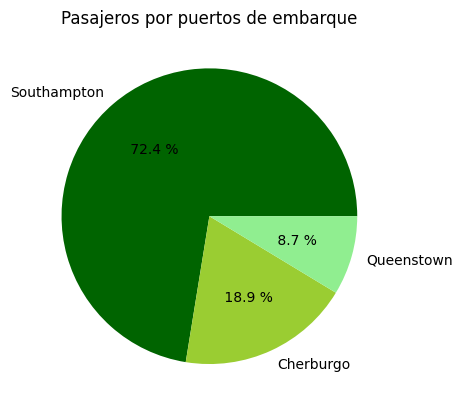

In [65]:
# Vemos el porcentaje del dato anterior :

puertos=[southampton,cherburgo,queenstown]  
nombres=['Southampton','Cherburgo','Queenstown']
plt.pie(puertos, labels=nombres, autopct="% 0.1f %%", colors=['darkgreen','yellowgreen','lightgreen']) 
plt.title('Pasajeros por puertos de embarque')
plt.show()

# Podemos comprobar que el 72 % del pasaje embarcó en el puerto inglés de Southampton donde partió el barco, el 18 % embarcó en el puerto 
# francés de Cherburgo, y en su última parada en el puerto irlandés de Queenstown embarcaron un 8 % de pasajeros.

In [66]:
# ¿Qué porcentaje de pasajeros sobrevivieron de cada lugar de procedencia?

# Southampton :

titanic_reparado[(titanic_reparado['Embarked']=='Southampton') & (titanic_reparado['Survived']==1)]['Survived'].count() *100/ southampton

# De las 644 personas que subieron en Southampton sólo sobrevivieron 217, un 33 % , por lo que la mayor parte de fallecidos provenían de este lugar.

33.69565217391305

In [67]:
# Cherburgo :

titanic_reparado[(titanic_reparado['Embarked']=='Cherburgo') & (titanic_reparado['Survived']==1)]['Survived'].count()*100/ cherburgo

# De las 168 personas que subieron en Cherburgo sobrevivieron 93, un 55 % , ya que como hemos visto antes, muchos de ellos viajaban en 1ªclase.

55.357142857142854

In [68]:
# Queenstown :

titanic_reparado[(titanic_reparado['Embarked']=='Queenstown') & (titanic_reparado['Survived']==1)]['Survived'].count()*100/queenstown

# De las 77 personas que subieron en Queenstown sobrevivieron 30 , un 38 % .

38.96103896103896

In [69]:
# Vemos la relación de supervivencia por puerto de embarque :

px.area(titanic_reparado, x='Embarked', y='Survived',title='Probabilidad de sobrevivir por puerto de embarque', template='plotly_white')

# Podemos comprobar que el mayor porcentaje de supervivencia fue la de los pasajeros embarcados en Cherburgo

In [70]:
# Analizamos ahora las familias que viajaban en el barco : 

# Vemos la relación que había entre la edad de los pasajeros y'SibSP': Cantidad de hermanos/as o esposos/as a bordo

px.scatter(titanic_reparado, x='Age', y='SibSp', color='SibSp', title='Hermanos/as o esposos/as a bordo',

color_continuous_midpoint=50, size='Age' ,color_continuous_scale= px.colors.sequential.Magenta_r).show()

# Podemos ver que la mayoría del pasaje no viajaba con hermanos/as o esposos/as , muchos de ellos si iban acompañados de un familiar, 
# en menor proporción de dos,de tres, de cuatro, de cinco , y por último , como dato llamativo, una persona de 29 años viajaba con 8 familiares
# entre esposo/a y hermanos/as.

In [71]:
# Comprobamos ahora cuantos pasajeros viajaban con padres o hijos a bordo ('Parch')

px.scatter(titanic, x='Age', y='Parch', color='Age', title='Padres o hijos a bordo',

color_continuous_midpoint=50, size='Parch' ,color_continuous_scale= px.colors.sequential.Magma).show()

# Podemos ver como muchos de ellos viajaban con padres o hijos, viendo mayor proporción en los niños al ir estos acompañados de sus padres,
# y algunos adultos con 4 ,5 y 6, llevando con ellos probablemente a sus padres y a todos sus hijos.

In [72]:
# Comprobamos el porcentaje de supervivencia de los dos datos anteriores: por familias que viajaban juntas:

px.violin(titanic_reparado, x='Survived', y=['Parch', 'SibSp'],title=' Supervivencia por familias',template='plotly_white')

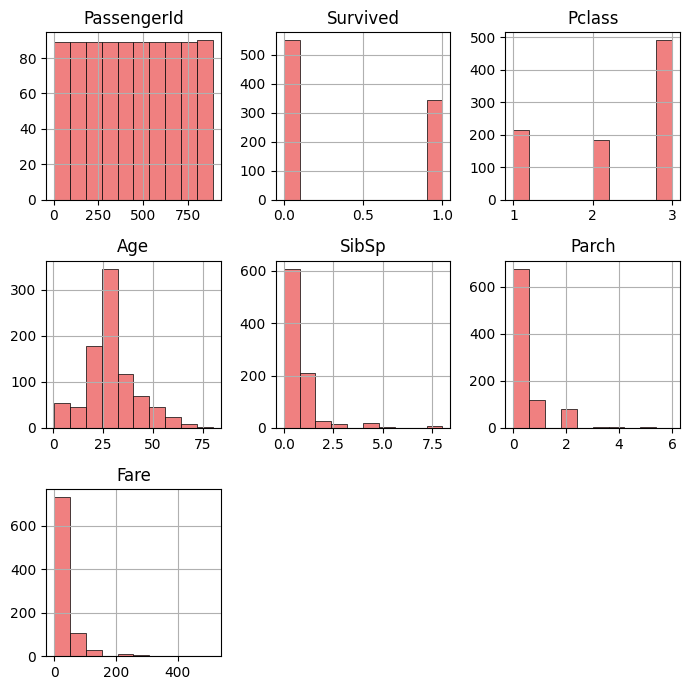

In [73]:
# Para finalizar comprobamos la distribución de todos los datos en los que había variables numéricas :

titanic_reparado.hist(figsize=(7,7) , color='lightcoral', edgecolor='k' , linewidth= 0.5) 
plt.tight_layout()
plt.show()

# En estos gráficos podemos ver un resumen de todo lo analizado, la cantidad de supervivientes, los pasajeros por clases, la districución de las 
# edades , los pasajeros que viajaban con familiares a bordo, y el precio de los tickets que pagaron cada uno .

3- CONCLUSIONES :

Tras haber analizado la supervivencia por edades, clases, por el precio de la tarifa que pagaron los pasajeros y por el puerto donde embarcaron,
podemos concluir que :

- La superviviencia estaba directamente relacionada con la clase en la que viajaban, teniendo un mayor índice de supervivencia los que viajaron en 1ª
clase, y altamente relacionada con el precio de la tarifa que pagaron, cuanto mayor fue el importe mayor probabilidad de supervivencia.

- La supervivencia fue mayor en mujeres y niños, la mayor parte de los fallecidos fueron hombres.

- La superviviencia fue mayor en los pasajeros embarcados en el puerto de Cherburgo (Francia), por el mayor porcentaje de pasajeros de 1ª clase,
habiendo un alto porcentaje de fallecidos en los pasajeros que embarcaron en el puerto británico de salida Southampton.